#### Apprentissage par la méthode des k-nn

In [1]:
#Importing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import time



#### Prendre un échantillon de données appelé data avec une taille de 5000 exemples à l’aide de la fonction np.random.randint(70000, size=5000). Diviser la base de données à 80% pour l’apprentissage (training) et à 20% pour les tests. Entrainez un classifieur k-nn avec k = 10 sur le jeu de données chargé. 

In [2]:
# dataset
mnist = fetch_openml('mnist_784') 
images = mnist.data.reshape((-1, 28, 28)) 
#plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest") 
#np.set_printoptions(threshold=np.inf) #Show all for print

#Echantillon
data,target=np.random.randint(70000, size=5000),range(5000)
#Split
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[data], mnist.target[data], train_size=0.8)
#Train
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(xtrain, ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

#### Afficher la classe de l’image 9 et sa classe prédite

In [3]:
#Test sur 9, à l'indice 22
prediction=model.predict(mnist.data[22].reshape(1, -1))
reel_nb = mnist.target[22]
print("Le classificateur prédit: "+str(prediction) + ", et le réel nombre est: " + str(mnist.target[22]))

Le classificateur prédit: ['9'], et le réel nombre est: 9


#### Affiche le score sur l’échantillon de test. Quel est le taux d'erreur sur vos données d'apprentissage ? Est-ce normal ?  

In [5]:
#Score
score=model.score(xtest,ytest)*100 #92.6
print("Score: "+str(score))
error=100-score
print("Taux d'erreur: "+str(error)+"\n")
print("A première vue, le taux d'erreur peut paraitre anormalement grand (environ 8%) malgré le fait qu'on ait un grand  nombre de voisins (k=10). Mais en réalité, ce score est tout à fait normal car quand il y a trop de voisins, cela diminue la précision. On verra cela plus tard, pour détérminer à quel niveau environ se situe ce seuil.")


Score: 91.9
Taux d'erreur: 8.099999999999994

A première vue, le taux d'erreur peut paraitre anormalement grand (environ 8%) malgré le fait qu'on ait un grand  nombre de voisins (k=10). Mais en réalité, ce score est tout à fait normal car quand il y a trop de voisins, cela diminue la précision. On verra cela plus tard, pour détérminer à quel niveau environ se situe ce seuil.


#### Faites varier le nombre de voisins (k) de 2 jusqu’à 15 et afficher le score. Quel est le k optimal ? 

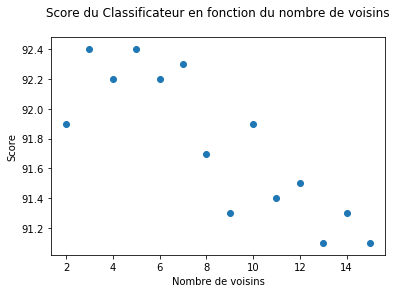

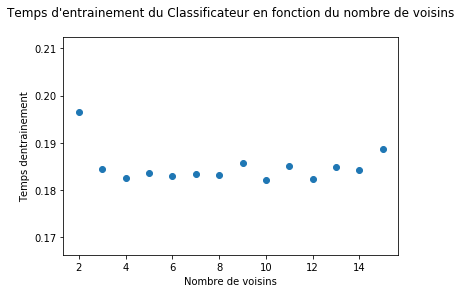


k est optimal pour les valeurs 4 et 5.


In [10]:
xk=[]
yprec=[]
yer=[]
ytime=[]

for i in range (2,16):
    # fit a k-nearest neighbor model to the data
    K = i
    model = KNeighborsClassifier(n_neighbors = K)
    start=time.time()
    model.fit(xtrain, ytrain)
    delay=time.time()-start
    #Score
    score=model.score(xtest,ytest)*100 #92.6
    error=100-score
    xk.append(i)
    yprec.append(score)
    yer.append(error)
    ytime.append(delay)

#Plot Score
plt.scatter(xk,yprec)
plt.title('Score du Classificateur en fonction du nombre de voisins\n')
plt.xlabel('Nombre de voisins')
plt.ylabel('Score')
plt.show()

#Plot Time
plt.scatter(xk,ytime)
plt.title('Temps d\'entrainement du Classificateur en fonction du nombre de voisins\n')
plt.xlabel('Nombre de voisins')
plt.ylabel('Temps dentrainement')
plt.show()

print("\nk est optimal pour les valeurs 4 et 5.")

#### Faites varier le pourcentage des échantillons (training et test) et afficher le score. Quel est le pourcentage remarquable ? 

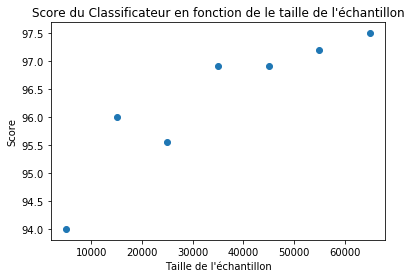

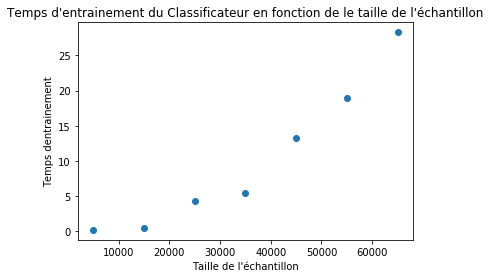


On remarque que plus l’échantillon est grand, plus le classificateur met de temps, surtout à partir des échantillons supérieurs à 2500. On remarque aussi que plus la taille de l'échantillon est grande, plus le score est meilleure, et on se rapproche des 100%


In [13]:
xs=[]
yprec=[]
yer=[]
ytime=[]
#k=5, 90% train

for i in range (5000,75000,10000):
    
    #Echantillon
    data,target=np.random.randint(70000, size=i),range(i)
    #Split
    xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[data], mnist.target[data], train_size=0.9)
    
    # fit a k-nearest neighbor model to the data
    model = KNeighborsClassifier(n_neighbors = 5)
    start=time.time()
    model.fit(xtrain, ytrain)
    delay=time.time()-start

    #Score
    score=model.score(xtest,ytest)*100 
    error=100-score
    xs.append(i)
    yprec.append(score)
    yer.append(error)
    ytime.append(delay)
    
#Plot Score
plt.scatter(xs,yprec)
plt.title('Score du Classificateur en fonction de le taille de l\'échantillon') 
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Score')
plt.show()

#Plot Time
plt.scatter(xs,ytime)
plt.title('Temps d\'entrainement du Classificateur en fonction de le taille de l\'échantillon') 
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Temps dentrainement')
plt.show()

print("\nOn remarque que plus l’échantillon est grand, plus le classificateur met de temps, surtout à partir des échantillons supérieurs à 2500. On remarque aussi que plus la taille de l'échantillon est grande, plus le score est meilleure, et on se rapproche des 100%")


#### Faites varier la taille de l’échantillon training et afficher la précision. Qu'est-ce que vous remarquez ?

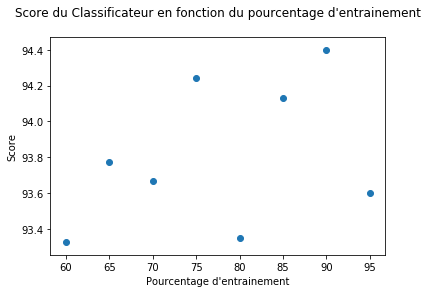

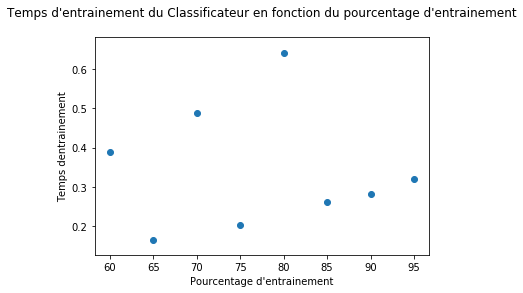


On remarque le max est atteint avec 90% d'entraînement et 10% de test et que au delà le score diminue, certainement car il n'y a quasiment plus de part de test


In [15]:
#We keep the optimal k=5
xp=[]
yprec=[]
yer=[]
ytime=[]

#Echantillon de 10000
data,target=np.random.randint(70000, size=10000),range(10000)

for i in range (60,100,5):
    
    #Split
    xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[data], mnist.target[data], train_size=i/100)
    
    # fit a k-nearest neighbor model to the data
    model = KNeighborsClassifier(n_neighbors = 5)
    start=time.time()
    model.fit(xtrain, ytrain)
    delay=time.time()-start

    #Score
    score=model.score(xtest,ytest)*100 
    error=100-score    
    xp.append(i)
    yprec.append(score)
    yer.append(error)
    ytime.append(delay)

#Plot Score
plt.scatter(xp,yprec)
plt.title('Score du Classificateur en fonction du pourcentage d\'entrainement\n')
plt.xlabel('Pourcentage d\'entrainement')
plt.ylabel('Score')
plt.show()

#Plot Time
plt.scatter(xp,ytime)
plt.title('Temps d\'entrainement du Classificateur en fonction du pourcentage d\'entrainement\n')
plt.xlabel('Pourcentage d\'entrainement')
plt.ylabel('Temps dentrainement')
plt.show()

print("\nOn remarque le max est atteint avec 90% d'entraînement et 10% de test et que au delà le score diminue, certainement car il n'y a quasiment plus de part de test")

#### Faites varier les types de distances (p). Quelle est la meilleure distance ? 


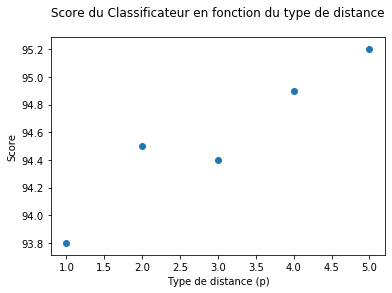

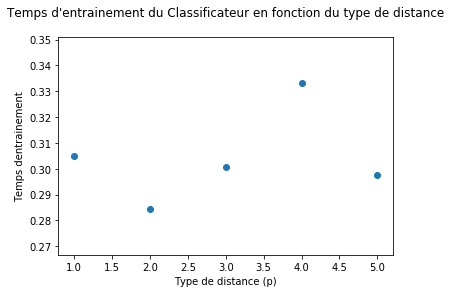


La mesure Euclidienne apporte de meilleures résultat que la distance de Manhattan. Les métriques suppérieurs à 3 offrent de meilleurs résultats que les 2 précédentes mais on ne connaît pas leurs natures.


In [20]:
#Echantillon de 10000, k=5, training=90%
data,target=np.random.randint(70000, size=10000),range(10000)
#Split
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[data], mnist.target[data], train_size=0.9)

xd=[]
yprec=[]
yer=[]
ytime=[]

for i in range (1,6):

    # Training
    model = KNeighborsClassifier(n_neighbors = 5,p=i)
    start=time.time()
    model.fit(xtrain, ytrain)
    delay=time.time()-start

    #Score
    score=model.score(xtest,ytest)*100 
    error=100-score
    xd.append(i)
    yprec.append(score)
    yer.append(error)
    ytime.append(delay)
    
#Plot Score
plt.scatter(xd,yprec)
plt.title('Score du Classificateur en fonction du type de distance\n')
plt.xlabel('Type de distance (p)')
plt.ylabel('Score')
plt.show()

#Plot Time
plt.scatter(xd,ytime)
plt.title('Temps d\'entrainement du Classificateur en fonction du type de distance\n')
plt.xlabel('Type de distance (p)')
plt.ylabel('Temps dentrainement')
plt.show()

print("\nLa mesure Euclidienne apporte de meilleures résultat que la distance de Manhattan. Les métriques suppérieurs à 3 offrent de meilleurs résultats que les 2 précédentes mais on ne connaît pas leurs natures.")
    


#### Fixer n_job à  1 puis à -1 et calculer le temps dans chacun

In [42]:
data,target=np.random.randint(70000, size=5000),range(5000)
# fit a k-nearest neighbor model to the data
K = 5
#Split
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[data], mnist.target[data], train_size=0.9)
    
for i in range (-1,2,2):    
    #n_jobs
    print("  n_jobs= "+str(i))

    model = KNeighborsClassifier(n_neighbors = K,n_jobs=i)
    model.fit(xtrain, ytrain)

    #Score
    score=model.score(xtest,ytest)*100 
    print("Score: "+str(score))
    error=100-score
    print("Erreur: "+str(error))


n_jobs= -1
score: 92.60000000000001
error: 7.3999999999999915

n_jobs= 1
score: 92.60000000000001
error: 7.3999999999999915



#### A votre avis, quels sont les avantages et les inconvénients des k-nn : optimalité ? temps de calcul ? passage à l'échelle ? 

#### Avantages:
    - Possibilité de réaliser des prédictions
    - Algorithme simple
    - Adapté aux modèles avec des frontières sont irrégulières, comme des chiffres dans notre cas

#### Inconvénients:
    - Non adapté aux données massives
    - Obligation de stocker tous l'apprentissage en mémoire
    - Prédiction plutôt lente, car nécessité de calculer les distances pour chaque points
